<a href="https://colab.research.google.com/github/AmanKumar16091/ML/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pathlib
import os
import glob
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/DogsCats.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

In [ ]:
TRAIN_DIR = "./DATASET"

ORG_DIR = "/content/train/train"

Class = ['cat', 'dog']


In [ ]:
for C in Class:
  DEST = os.path.join(TRAIN_DIR, C)

  if not os.path.exists(DEST):
    os.makedirs(DEST)
  
  for img_path in glob.glob(os.path.join(ORG_DIR, C) + "*"):
    SRC = img_path

    shutil.copy(SRC, DEST)

# **Model Buliding**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Getting layers
from keras.layers import Dense, Flatten
# Functional API
from keras.models import Model
# Pretrained model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
# For preprocessing
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
import keras

In [ ]:
base_model = InceptionV3(input_shape=(128,128,3), include_top= False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainanle = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units = 2, activation= "sigmoid")(X)

# Final model 
model = Model(base_model.input, X)

# Compile the model
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

# Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

# Pre process data using Data Generator

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rotation_range= 0.4,
                                   width_shift_range= 0.3,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input,
                                   zoom_range=0.4,
                                   shear_range=0.4)
                                   
train_data = train_datagen.flow_from_directory(directory= "/content/DATASET",
                                               target_size= (128,128),
                                               batch_size=64)


Found 25000 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cat': 0, 'dog': 1}

# Visualizing the data

In [ ]:
t_img, lable = train_data.next()


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
def plotImages(img_arr, lable):
  for idx, img in enumerate(img_arr):
    if idx <= 10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


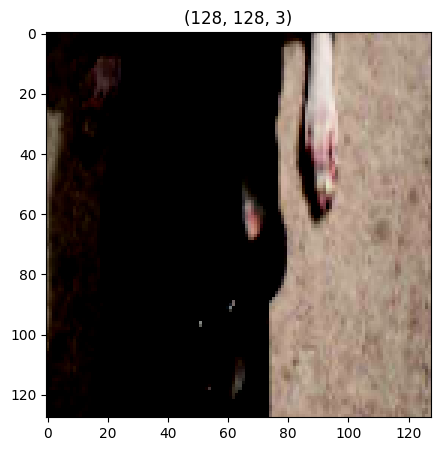

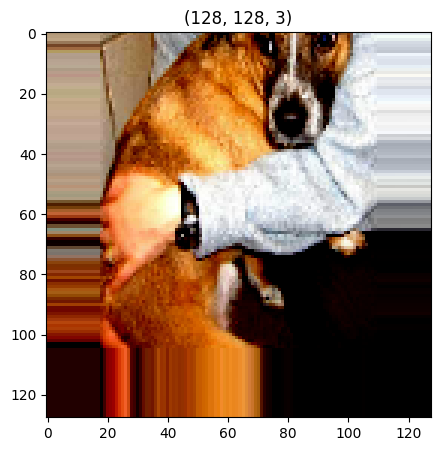

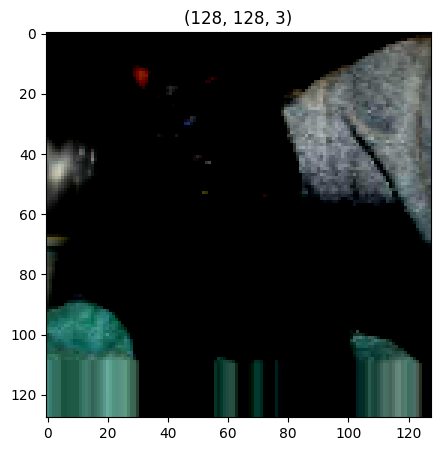

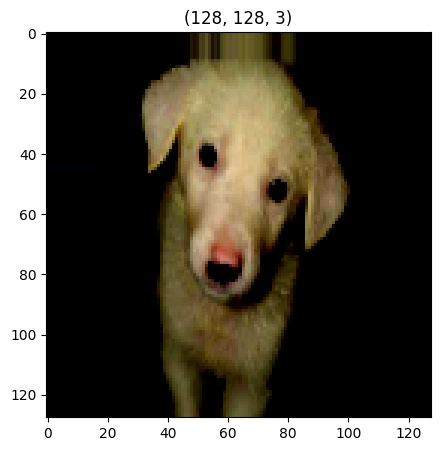

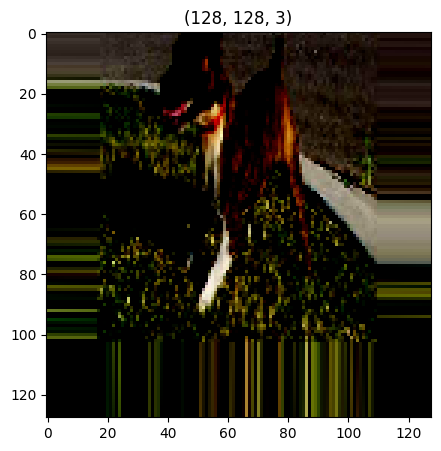

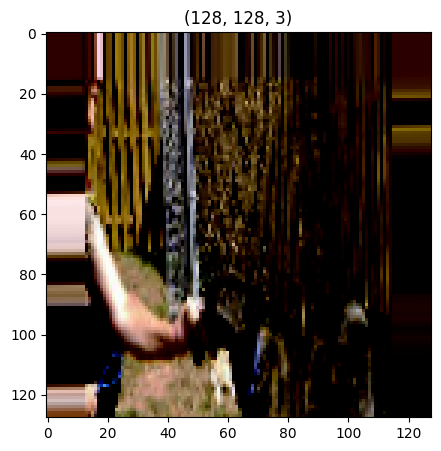

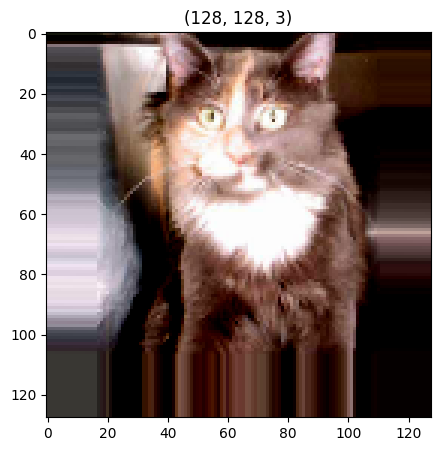

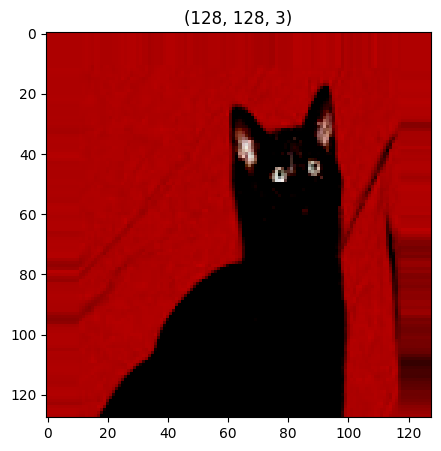

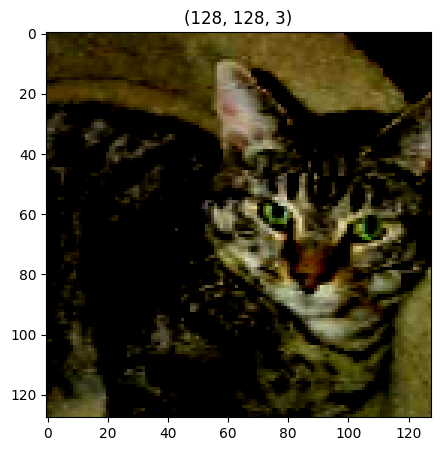

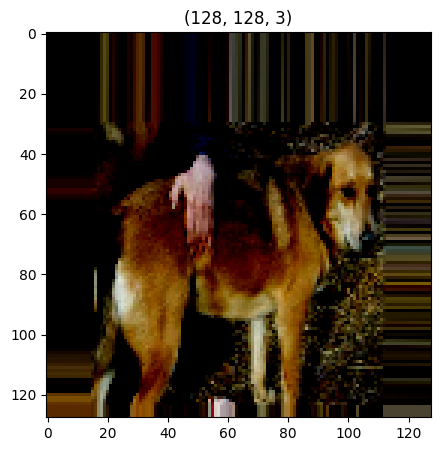

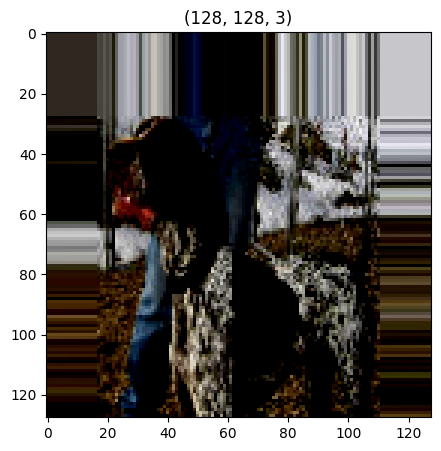

In [ ]:
plotImages(t_img, lable)

# Model Checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath= "./best_model.h5", 
                     monitor = "accuracy",
                     verbose=1, 
                     save_best_only= True )

es = EarlyStopping(monitor= "accuracy", 
                   min_delta= 0.01,
                   patience= 5,
                   verbose = 1)

cb = [mc, es]

In [ ]:
his = model.fit(train_data, 
                          steps_per_epoch=10,
                          epochs = 10, 
                          callbacks = cb)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.5984 
Epoch 1: accuracy improved from -inf to 0.59844, saving model to ./best_model.h5
10/10 [==============================] - 162s 13s/step - loss: 0.6977 - accuracy: 0.5984
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6577 - accuracy: 0.6969 
Epoch 2: accuracy improved from 0.59844 to 0.69687, saving model to ./best_model.h5
10/10 [==============================] - 134s 13s/step - loss: 0.6577 - accuracy: 0.6969
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.5945 - accuracy: 0.7266 
Epoch 3: accuracy improved from 0.69687 to 0.72656, saving model to ./best_model.h5
10/10 [==============================] - 130s 13s/step - loss: 0.5945 - accuracy: 0.7266
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.7953 
Epoch 4: accuracy improved from 0.72656 to 0.79531, saving model to ./best_model.h5
10/10 [=============

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

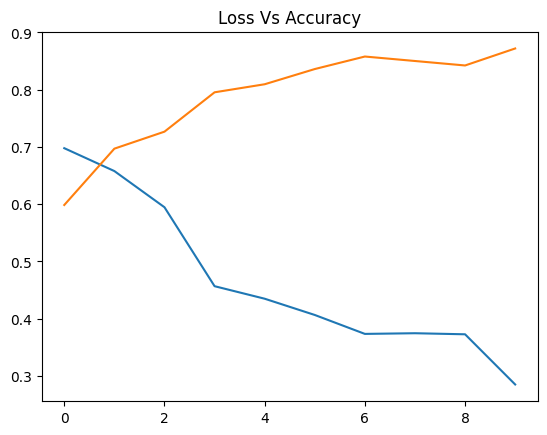

In [ ]:
plt.plot(h['loss'])
plt.plot(h['accuracy'])

plt.title("Loss Vs Accuracy")
plt.show()

#Validate our model

1/1 [==============================] - 0s 88ms/step


This is a cat


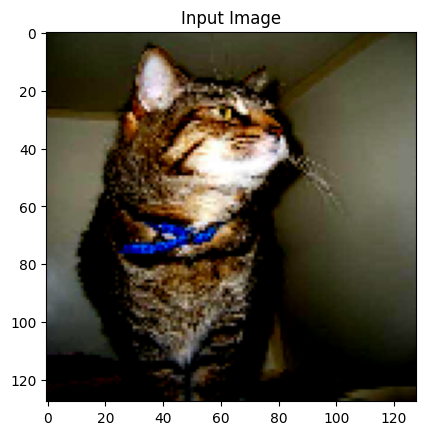

In [ ]:

path = "/content/test/test/263.jpg"
img = image.load_img(path, target_size =(128,128))

i = image.img_to_array(img)
i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred==0:
  print("This is a cat")
else:
  print("This is a dog")

# to display the image
plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()